# AS07 Collocation for finding enthusiastic commentors

在文字探勘的第二單元我們介紹了Collocation來找出significant word pair。同樣的方法，我也可以把他改造來找出，在討論板上哪兩個人老是一起出現。你可以想像說在一個討論板中，某一主題一出來，某些人就會突然冒出來開始Comment。並且A下了Comment後，很快的B也會跟著下Comment。我們可以用Collocation的概念來找出這些總是一起出現的Commentors。但社會科學會把這樣的關係稱為Cooccurrence（共現）。

## Loading data

In [3]:
# colab
import pickle
!wget https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat -O pttpost_20210509_n178.dat
with open("pttpost_20210509_n178.dat", "rb") as fin:
    all_post = pickle.load(fin)

--2021-05-10 04:39:31--  https://github.com/P4CSS/PSS/raw/master/data/pttpost_20210509_n178.dat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/P4CSS/PSS/master/data/pttpost_20210509_n178.dat [following]
--2021-05-10 04:39:31--  https://raw.githubusercontent.com/P4CSS/PSS/master/data/pttpost_20210509_n178.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 992132 (969K) [application/octet-stream]
Saving to: ‘pttpost_20210509_n178.dat’

pttpost_20210509_n1 100%[===================>] 968.88K  --.-KB/s    in 0.06s   

2021-05-10 04:39:31 (15.9 MB/s) - ‘pttpost_20210509_n178.dat’ saved [992132/99213

In [1]:
# jupyterlab
import pickle
with open("../data/pttpost_20210509_n178.dat", "rb") as fin:
    all_post = pickle.load(fin)

In [2]:
print(len(all_post))
print(all_post[0])
print("-"*80)
for comment in all_post[5]['comments']:
    print(comment)

178
{'author': 's72005ming (QQ)', 'authorid': 's72005ming', 'nickname': 'QQ', 'link': 'https://www.ptt.cc/bbs/Gossiping/M.1620528765.A.DBD.html', 'title': '[問卦] 美國會研究因武漢肺炎死亡的人種嗎？', 'timestamp': 'Sun May  9 10:52:43 2021', 'content': '美國是民族大熔爐\n\n全世界各種人種都有\n\n但是依照各個人種做研究又有歧視的問題\n\n以美國這麼重視人權和觀感的國家\n\n會有研究因武漢肺炎死亡人種的論文嗎？\n\n\n好奇如果有哪一個人種死亡數最少\n\n我猜是華裔就是了！\n\n聽說疫情發生後一堆華裔老人連出門剪頭髮都不敢！--', 'comments': [{'tag': '推 ', 'userid': 'shiriri', 'content': ': 有很多了 黑人跟拉丁裔比較高 亞裔跟白人差不多', 'timestamp': ' 05/09 10:59\n'}, {'tag': '→ ', 'userid': 'HELLDIVER', 'content': ': 有趣的是 剛開始大爆發時 還說亞洲人比較會得武漢病毒', 'timestamp': ' 05/09 11:01\n'}, {'tag': '噓 ', 'userid': 'redsa12', 'content': ': 網路即時數據就都有按人種按年齡區分的數據了...', 'timestamp': ' 05/09 11:06\n'}, {'tag': '→ ', 'userid': 'redsa12', 'content': ': 問之前先估狗好嗎 加油好嗎', 'timestamp': ' 05/09 11:06\n'}]}
--------------------------------------------------------------------------------
{'tag': '推 ', 'userid': 'bignoob', 'content': ': 邊抱怨邊打啊 台灣人的不都這樣', 'timestamp': ' 05/08 14:32\n'}

## 1. Collocation as Cooccurrence
只要在同一則貼文的comments內，我們把任兩個commentor視為有co-comment，也就是Cooccurrence（共現）的關係。請計算出共現於本資料集中，頻率最高的前20對commentor（必須印出Collocation times作為參考）。
```
s72005ming	sl11pman	450
loham	sl11pman	450
sl11pman	s72005ming	450
sl11pman	loham	450
cwh0105	sl11pman	360
sl11pman	cwh0105	360
iampig951753	Runna	294
Runna	iampig951753	294
frank355571	sl11pman	270
sl11pman	frank355571	270
NICEGOGO	sl11pman	180
sl11pman	NICEGOGO	180
sl11pman	dawson0130	180
sl11pman	userlance	180
sl11pman	carryton	180
sl11pman	CheshireS	180
sl11pman	vic4580849	180
sl11pman	justeit	180
dawson0130	sl11pman	180
userlance	sl11pman	180
```

In [3]:
commentor_dict = dict()

for i in range(len(all_post)):
    commentor_dict[i] = []
    for comment in all_post[i]['comments']:
        commentor_dict[i].append(comment['userid'])
# print(commentor_dict)

In [4]:
from collections import Counter

commentor_pair_counts = Counter()
for commentor in commentor_dict.values():
    for i in range(len(commentor)-1):
        for j in range(len(commentor)-1):
            (c1, c2) = (commentor[i], commentor[j])
            if c1 != c2:
                commentor_pair_counts[(c1, c2)] += 1
                
for (c1, c2), c in commentor_pair_counts.most_common(20):
    print('{}\t{}\t{}'.format(c1, c2, c))

s72005ming	sl11pman	450
loham	sl11pman	450
sl11pman	s72005ming	450
sl11pman	loham	450
cwh0105	sl11pman	360
sl11pman	cwh0105	360
iampig951753	Runna	294
Runna	iampig951753	294
frank355571	sl11pman	270
sl11pman	frank355571	270
NICEGOGO	sl11pman	180
sl11pman	NICEGOGO	180
sl11pman	dawson0130	180
sl11pman	userlance	180
sl11pman	carryton	180
sl11pman	CheshireS	180
sl11pman	vic4580849	180
sl11pman	justeit	180
dawson0130	sl11pman	180
userlance	sl11pman	180


## 2. Using MI
MI的計算方式主要是為了要標準化任一字的出現次數和任兩個字的出現次數的影響。請用MI的方式計算出哪兩個人特別常一起出現在同一則貼文的comments中。請用`most_common()`印出M前20大MI的Pairs（必須印出MI值作為參考）。
```
loham sl11pman 450 5.535381
sl11pman loham 450 5.535381
frank355571 sl11pman 270 5.535381
sl11pman frank355571 270 5.535381
NICEGOGO sl11pman 180 5.535381
sl11pman NICEGOGO 180 5.535381
sl11pman dawson0130 180 5.535381
sl11pman CheshireS 180 5.535381
sl11pman vic4580849 180 5.535381
sl11pman justeit 180 5.535381
dawson0130 sl11pman 180 5.535381
CheshireS sl11pman 180 5.535381
vic4580849 sl11pman 180 5.535381
justeit sl11pman 180 5.535381
goddamnhuge sl11pman 90 5.535381
donyin sl11pman 90 5.535381
crazywiwi sl11pman 90 5.535381
kaerusiro sl11pman 90 5.535381
mmrhahaha sl11pman 90 5.535381
EBOD081 sl11pman 90 5.535381

```

In [5]:
import math
def mutual_information(w1_w2_prob, w1_prob, w2_prob):
    return math.log2(w1_w2_prob / (w1_prob * w2_prob))

In [6]:
commentor_counts = Counter()
for commentor in commentor_dict.values():
    for i in range(len(commentor)):
        commentor_counts[commentor[i]] += 1

In [7]:
num_unigrams = sum(commentor_counts.values())
num_bigrams = sum(commentor_pair_counts.values())

commentor_mutual_information_scores = Counter()
for (c1, c2), c1_c2_count in commentor_pair_counts.most_common():
    c1_prob = commentor_counts[c1] / num_unigrams
    c2_prob = commentor_counts[c2] / num_unigrams
    c1_c2_prob = c1_c2_count / num_bigrams
    commentor_mutual_information_scores[(c1, c2)] = mutual_information(c1_c2_prob, c1_prob, c2_prob)

for (c1, c2), mi in commentor_mutual_information_scores.most_common(20):
    print('{}\t{}\t{}\t{:.6f}'.format(c1, c2, commentor_pair_counts[(c1, c2)], mi))

loham	sl11pman	450	5.535381
sl11pman	loham	450	5.535381
frank355571	sl11pman	270	5.535381
sl11pman	frank355571	270	5.535381
NICEGOGO	sl11pman	180	5.535381
sl11pman	NICEGOGO	180	5.535381
sl11pman	dawson0130	180	5.535381
sl11pman	CheshireS	180	5.535381
sl11pman	vic4580849	180	5.535381
sl11pman	justeit	180	5.535381
dawson0130	sl11pman	180	5.535381
CheshireS	sl11pman	180	5.535381
vic4580849	sl11pman	180	5.535381
justeit	sl11pman	180	5.535381
goddamnhuge	sl11pman	90	5.535381
donyin	sl11pman	90	5.535381
crazywiwi	sl11pman	90	5.535381
kaerusiro	sl11pman	90	5.535381
mmrhahaha	sl11pman	90	5.535381
EBOD081	sl11pman	90	5.535381


## 3. Cooccurrence with distance
就上述的資料集，我想定義的人與人的關係是「這兩個人老是一前一後出現」，所以我規劃僅計算前後5則以內的comments，也就是說，在同一貼文中，如果A是第一則comment，B是第六則comment，C是第七則，那我不列計A和C的關係，但列計A和B的關係。請用collocation with distance的觀念，計算任兩個comment間的平均距離，並用`most_comment()`列印出平均距離最短的前二十對commentors。
```
chen0625-Qinsect	1.500000	2
kenryu-bar1005	1.500000	2
bar1005-jetalpha	1.500000	2
typeklng-GARRETH	1.500000	2
GARRETH-fenix220	1.500000	2
KaiManSo-nikewang	1.500000	2
gwenwoo-s359999	1.500000	2
a410046-apatosaurus	1.500000	2
apatosaurus-t934140225	1.500000	2
username1-TsmcEE	1.500000	2
bigwun73-yheb88	1.500000	2
l88-sali921	1.500000	2
ab4daa-cecille	1.500000	2
kingstongyu-ntlutw	1.500000	2
ntlutw-kid1a2b3c4d	1.500000	2
kuan12065-lazarus1121	1.500000	2
show282-kuosambition	1.000000	2
Yonhao-jump693	1.000000	2
sellgd-smalltwo	1.000000	2
lazarus1121-tenka92417	1.000000	2
```

In [8]:
window_size = 5

commentor_pair_distance_counts = Counter()
commentor_pair_counts_dis = Counter()
commentor_pair_distance_mean = Counter()

for commentor in commentor_dict.values():
    for i in range(len(commentor) - 1):
        for distance in range(1, window_size):
            if i + distance < len(commentor):
                c1 = commentor[i]
                c2 = commentor[i + distance]
                if c1 != c2:
                    commentor_pair_distance_counts[(c1, c2)] += distance
                    commentor_pair_counts_dis[(c1, c2)] += 1
  
                
for (c1, c2), distance  in commentor_pair_distance_counts.most_common():
    if commentor_pair_counts_dis[(c1, c2)] > 1:
        commentor_pair_distance_mean[(c1, c2)] = distance / (commentor_pair_counts_dis[(c1, c2)])


      
for (c1, c2), m in commentor_pair_distance_mean.most_common()[-20:]:
    print('{}-{}\t{:.6f}\t{}'.format(c1, c2, m, commentor_pair_counts_dis[(c1, c2)]))

chen0625-Qinsect	1.500000	2
kenryu-bar1005	1.500000	2
bar1005-jetalpha	1.500000	2
typeklng-GARRETH	1.500000	2
GARRETH-fenix220	1.500000	2
KaiManSo-nikewang	1.500000	2
gwenwoo-s359999	1.500000	2
a410046-apatosaurus	1.500000	2
apatosaurus-t934140225	1.500000	2
username1-TsmcEE	1.500000	2
bigwun73-yheb88	1.500000	2
l88-sali921	1.500000	2
ab4daa-cecille	1.500000	2
kingstongyu-ntlutw	1.500000	2
ntlutw-kid1a2b3c4d	1.500000	2
kuan12065-lazarus1121	1.500000	2
show282-kuosambition	1.000000	2
Yonhao-jump693	1.000000	2
sellgd-smalltwo	1.000000	2
lazarus1121-tenka92417	1.000000	2


## 4. Drawing collocation network
以下已經提供給你部分不同網絡的視覺化方法和參數調整方法。如果你要看懂每個函式有可能要查閱Networkx的Document，不過這是為了push你去查閱document來理解這些程式碼。

列印出mi值或count值前500大、前1000大、前2000大（會有點吃力）的pairs of user，並觀察該圖型。基於co-commentor的網絡視覺化，你認為這群co-commenter有什麼特性？請多列印幾種版本，並將你的看法寫在以下的ANSWER後：
### ANSWER:
根據老師所畫的圖形，我發現有特定數名作者因為時常出現在一起，有的數十名連成線，有的四五成形，因此可從中推測彼此連線成形的作者可能有關係。

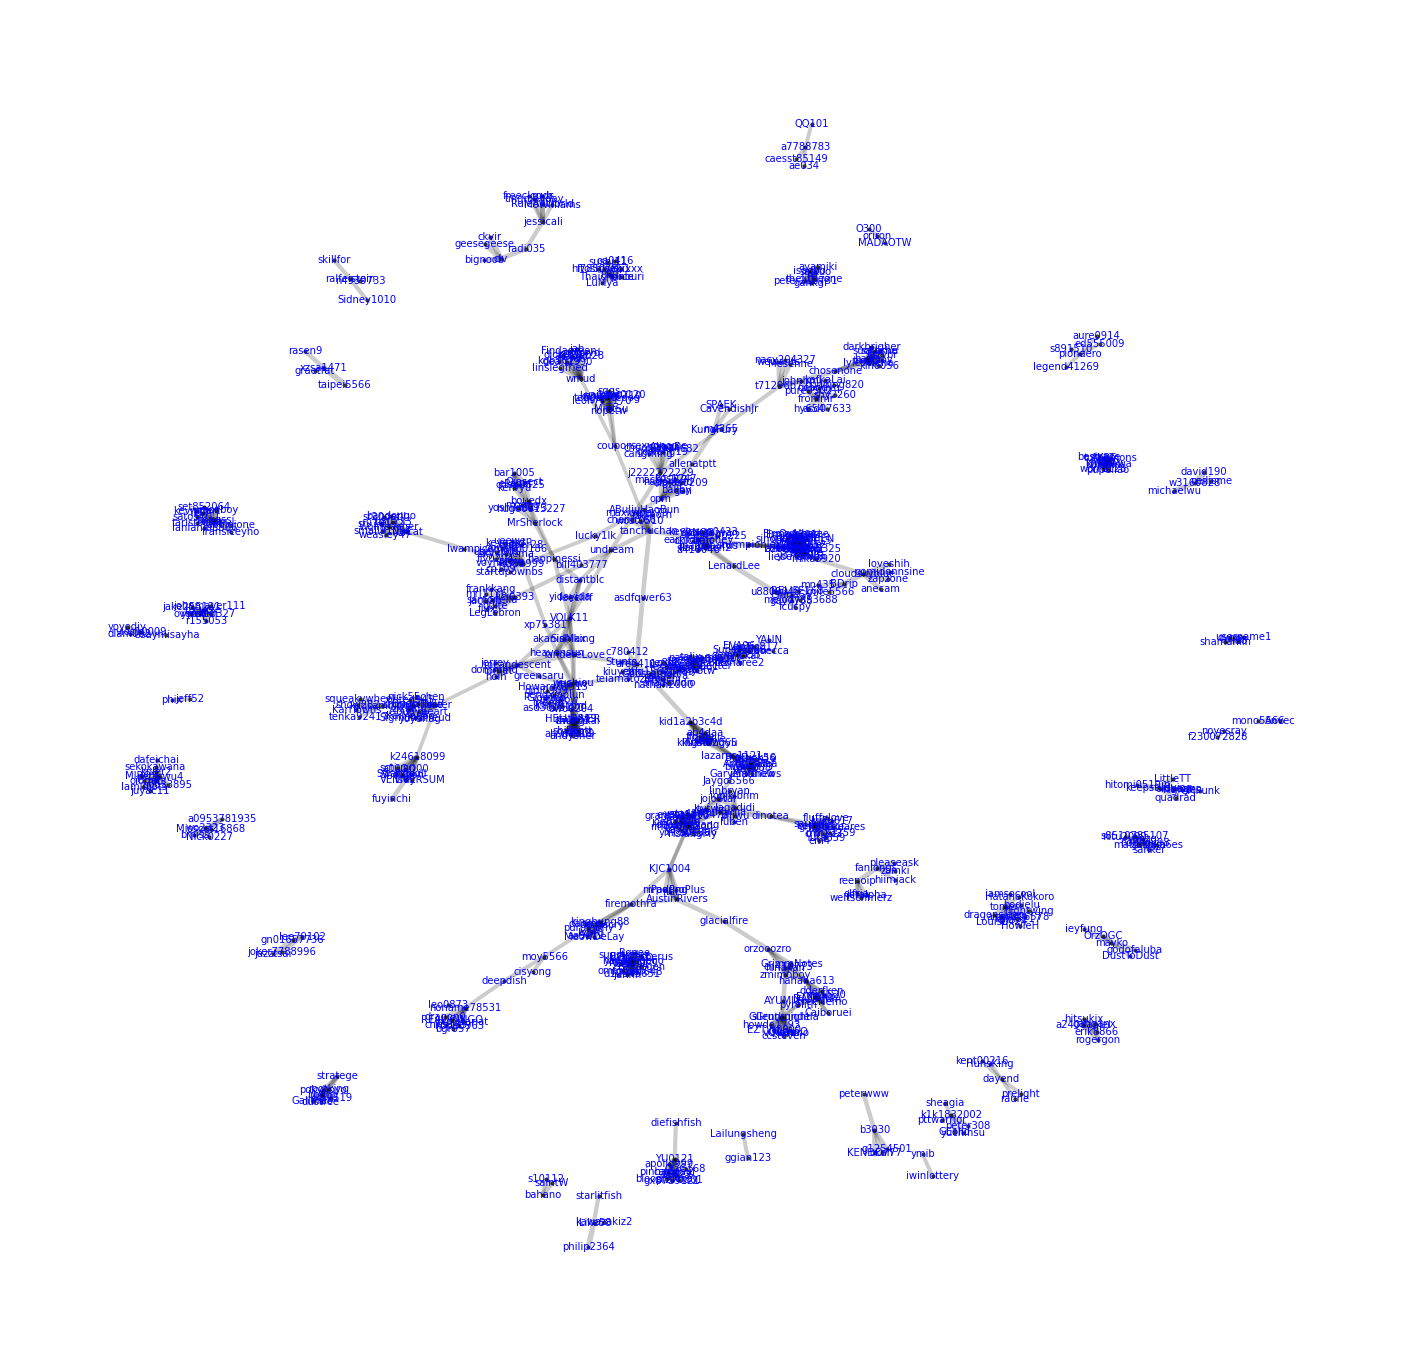

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
li = [(w1, w2, commentor_pair_counts[(w1, w2)], mi) for (w1, w2), mi in commentor_mutual_information_scores.most_common()]
df = pd.DataFrame.from_records(li, columns =['w1', 'w2', 'count', 'mi'])

import networkx as nx
fig = plt.figure(1, figsize=(30, 30), dpi=60)

G = nx.from_pandas_edgelist(df[:2000],
                            source = 'w1',
                            target = 'w2',
                            edge_attr = 'mi')
widths = nx.get_edge_attributes(G, 'mi')
nodelist = G.nodes()
# nx.draw_kamada_kawai(G,
#                     node_size = 5,
#                     edge_color = "#8833FF",
#                     with_labels = True)
pos = nx.spring_layout(G)
# nx.draw_spring(G,
#                node_size = 5,
#                edge_color = "#8833FF",
#                font_size = 16,
#                with_labels = True)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=15,
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list([w/2 for w in widths.values()]),
                       edge_color='black',
                       alpha=0.2)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='blue')
plt.box(False)
plt.show()

## 也可使用pyvis.network畫畫看

In [50]:
from pyvis.network import Network
net = Network('1024px', '2048px', notebook=True)
net.from_nx(G)
net.show("test.html")

## 4. Thinking
這樣的做法是否有助於察覺特定網軍的協同合作？